In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
################# STORY######################
#### Students Performance in Exams ##########

#gender: Gender of the student (Male/Female)
#race/ethnicity: Race/ethnicity of the student (e.g., Group A, Group B, etc.).
#parental level of education: Parent's level of education (e.g., High School, Bachelor's Degree, etc.)
#lunch:Type of lunch received by the student (e.g., Standard, Free/Reduced).
#test preparation course: Completion status of
#math score: Score of the student in the math exam
#reading score: Score of the student in the reading exam
#writing score: Score of the student in the writing exam

In [12]:
df_ = pd.read_csv("StudentsPerformance.csv")
df= df_.copy()
pd.set_option("display.width",500)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum() # There are no missing values in the dataset.

In [3]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'test preparation course', 'lunch']

In [6]:
for col in columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()


--- gender ---
gender
female    518
male      482
Name: count, dtype: int64

--- race/ethnicity ---
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

--- parental level of education ---
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

--- test preparation course ---
test preparation course
none         642
completed    358
Name: count, dtype: int64

--- lunch ---
lunch
standard        645
free/reduced    355
Name: count, dtype: int64



In [7]:
num_columns = ['math score', 'reading score', 'writing score']

In [8]:
for col in num_columns:
    print(f"--- {col} ---")
    print(df[col].describe())
    print()


--- math score ---
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

--- reading score ---
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

--- writing score ---
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64



In [13]:
df["average"] = (df["math score"]+df["reading score"] + df["writing score"]) / 3
df["average"].head() # I created a new variable by taking the average of the exam results.

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average, dtype: float64

In [14]:
# Catagorical Columns
c_df = df.select_dtypes(include=["object"])
c_df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [15]:
num_df = df.select_dtypes(include=np.number)
num_df.head()

,math score,reading score,writing score,average
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


In [16]:
########## Barplot Graphics ##############

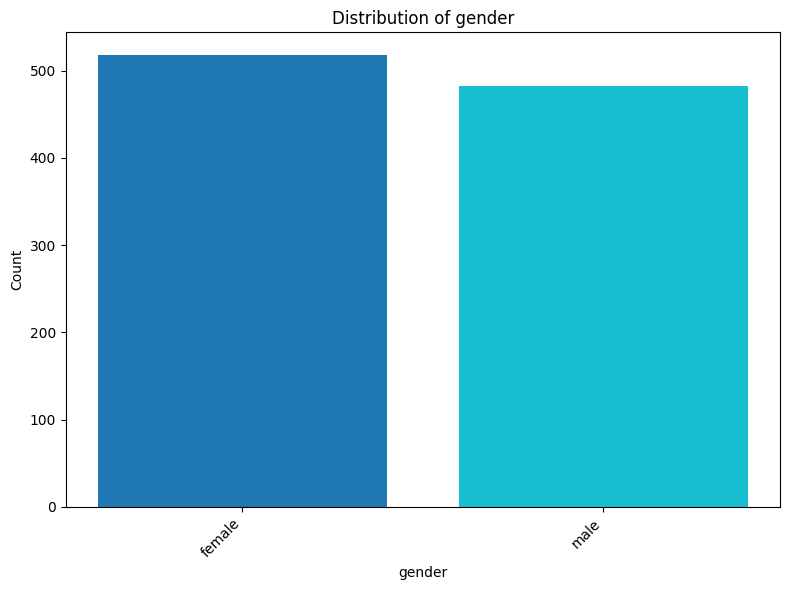

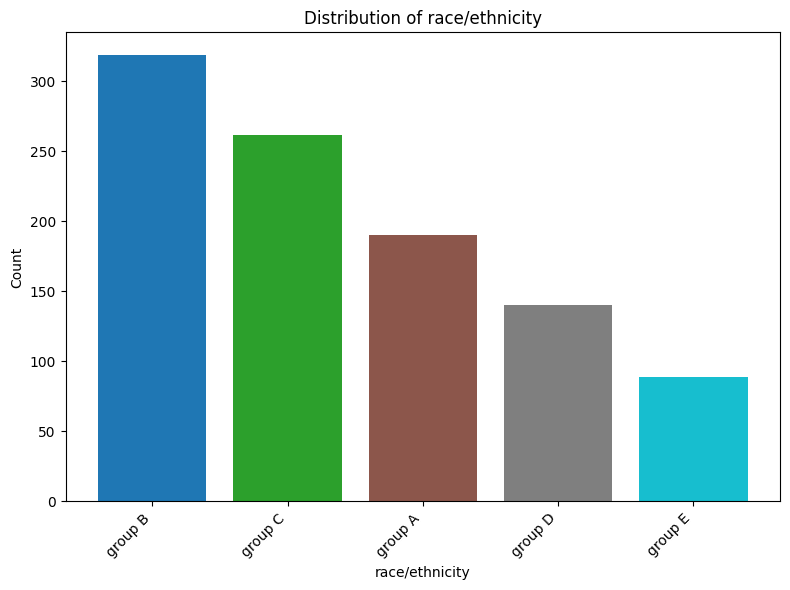

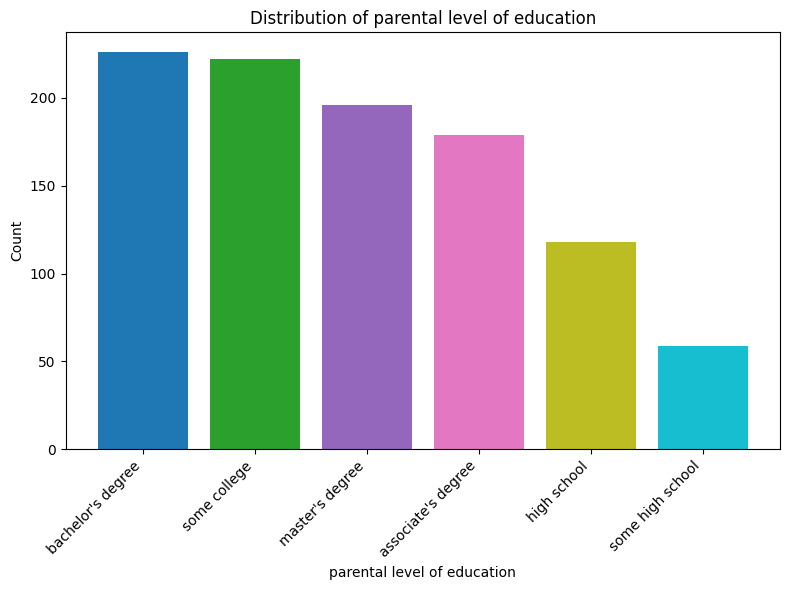

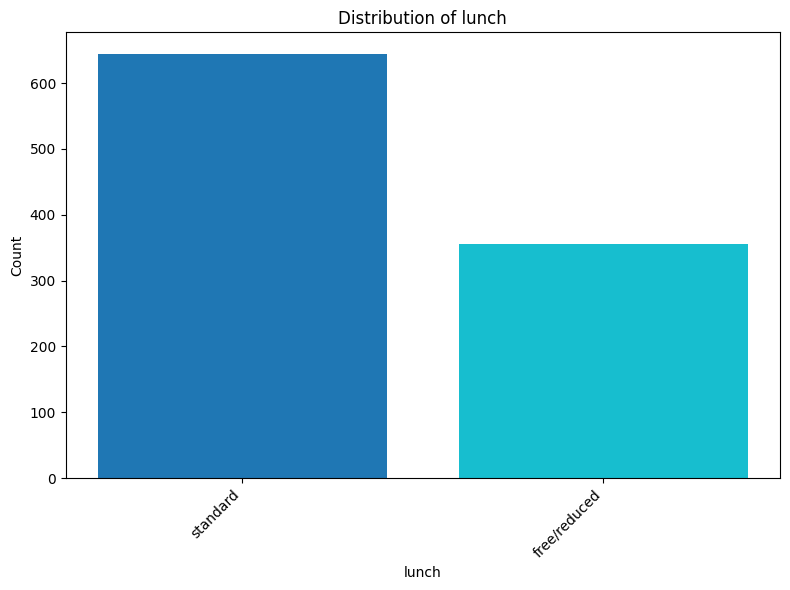

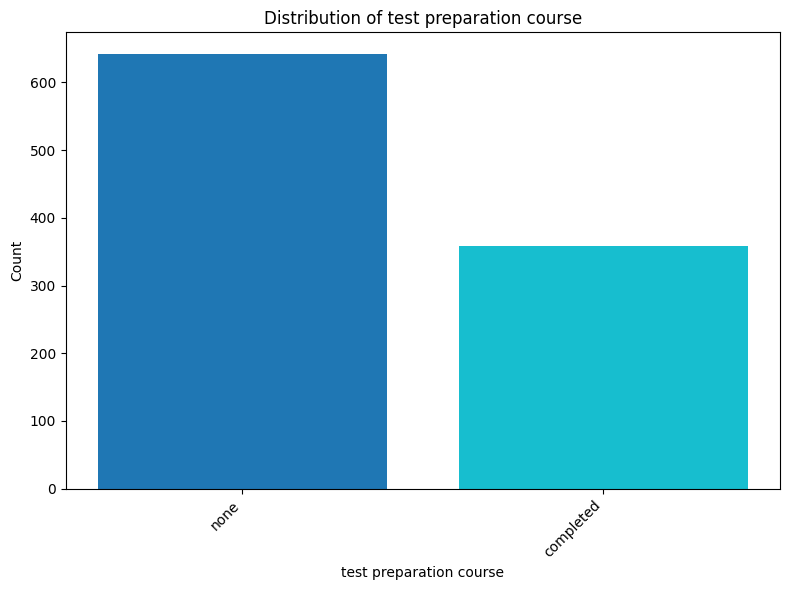

In [17]:
for column in c_df.columns:
    if c_df[column].dtype == 'object':
        unique_values = c_df[column].unique()
        num_unique = len(unique_values)
        colors = plt.cm.tab10(np.linspace(0, 1, num_unique))  
        plt.figure(figsize=(8, 6))
        plt.bar(unique_values, c_df[column].value_counts(), color=colors)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


C:\Users\umut\AppData\Local\Temp\ipykernel_23940\4025365744.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='average', hue='lunch', data=df, ci=None)


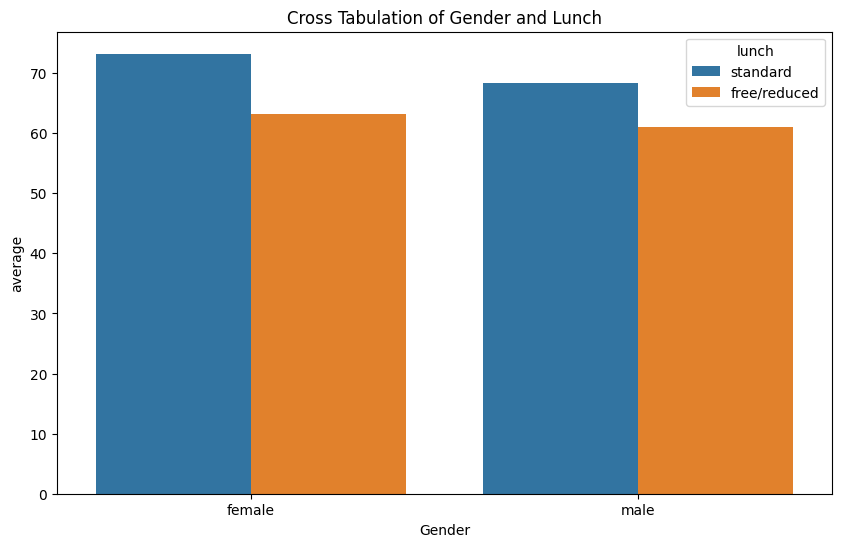

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='average', hue='lunch', data=df, ci=None)
plt.title('Cross Tabulation of Gender and Lunch')
plt.xlabel('Gender')
plt.ylabel('average')
plt.show()

C:\Users\umut\AppData\Local\Temp\ipykernel_23940\4244827541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='average',data=df,  palette=palette)


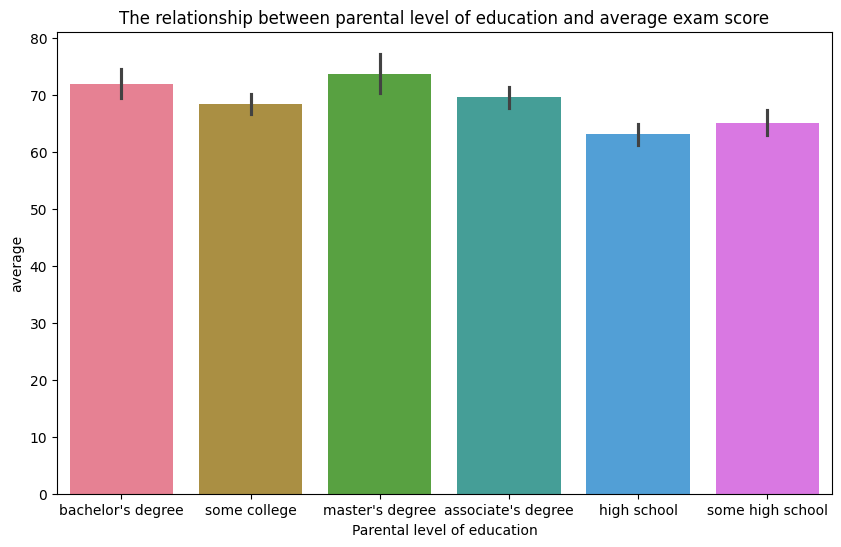

In [19]:
palette = sns.color_palette("husl", len(df['parental level of education'].unique())) 
plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='average',data=df,  palette=palette)
plt.title('The relationship between parental level of education and average exam score')
plt.xlabel('Parental level of education')
plt.ylabel('average')
plt.show()

C:\Users\umut\AppData\Local\Temp\ipykernel_23940\4036023337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race/ethnicity', y='average',data=df,  palette=palette)


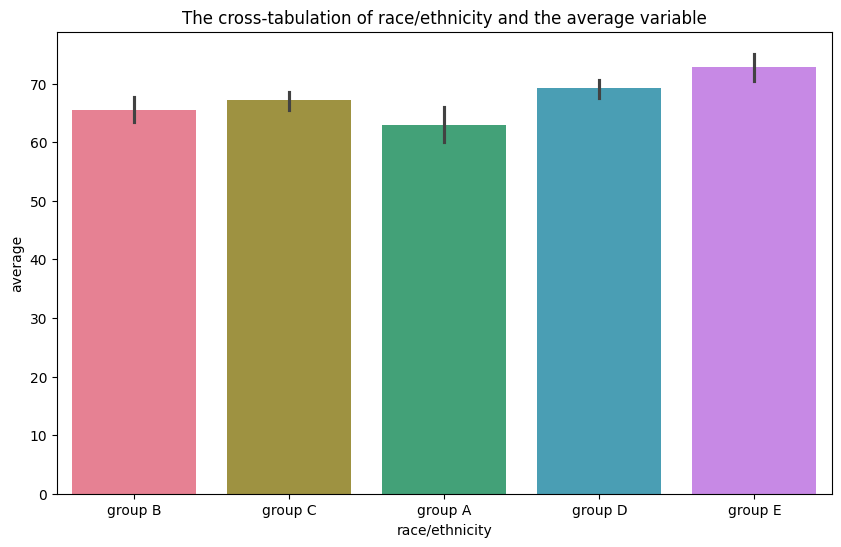

In [20]:
palette = sns.color_palette("husl", len(df['race/ethnicity'].unique())) 
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='average',data=df,  palette=palette)
plt.title('The cross-tabulation of race/ethnicity and the average variable')
plt.xlabel('race/ethnicity')
plt.ylabel('average')
plt.show()

C:\Users\umut\AppData\Local\Temp\ipykernel_23940\3558600084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test preparation course', y='average',data=df,  palette=palette)


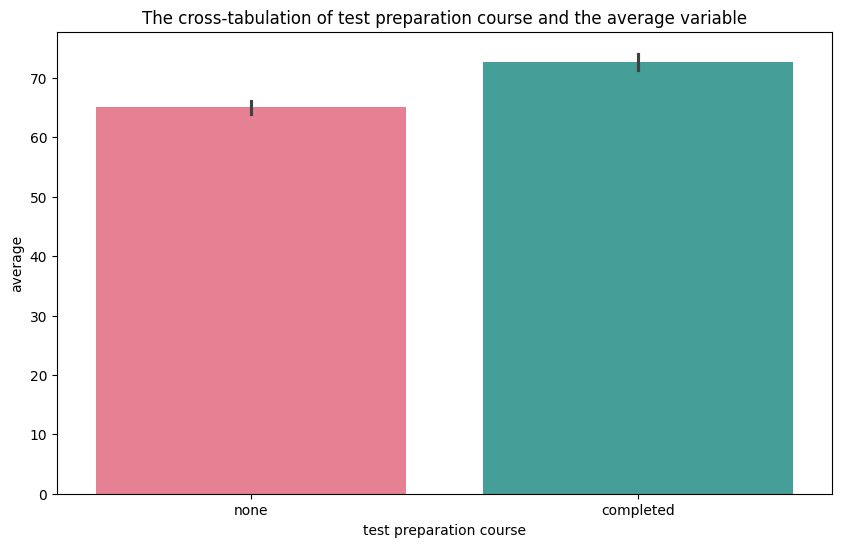

In [21]:
palette = sns.color_palette("husl", len(df['test preparation course'].unique())) 
plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='average',data=df,  palette=palette)
plt.title('The cross-tabulation of test preparation course and the average variable')
plt.xlabel('test preparation course')
plt.ylabel('average')
plt.show()

In [22]:
########### Boxplot Graphics ###########

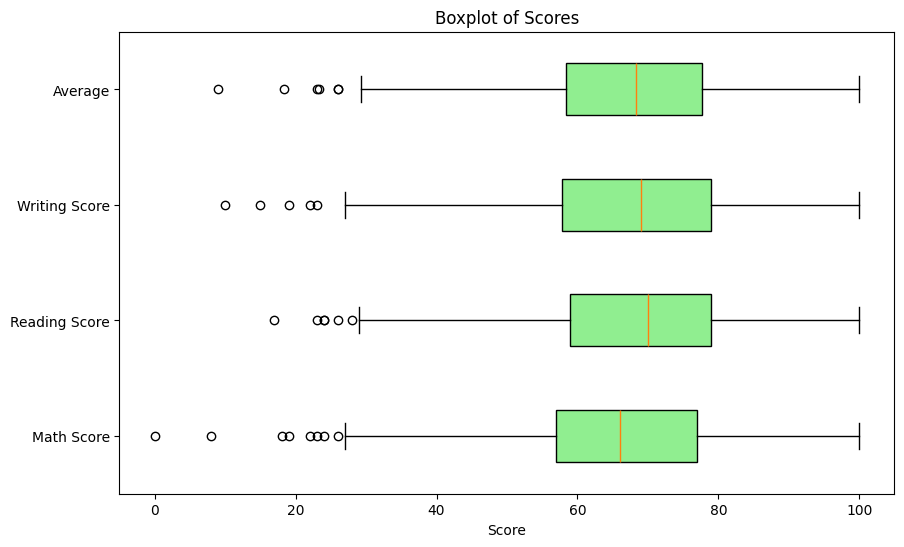

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['math score'], df['reading score'], df['writing score'], df["average"]], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))  
plt.yticks([1, 2, 3,4], ['Math Score', 'Reading Score', 'Writing Score',"Average"])
plt.xlabel('Score')
plt.title('Boxplot of Scores')
plt.show()

C:\Users\umut\AppData\Local\Temp\ipykernel_23940\1934494375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='Pastel1')


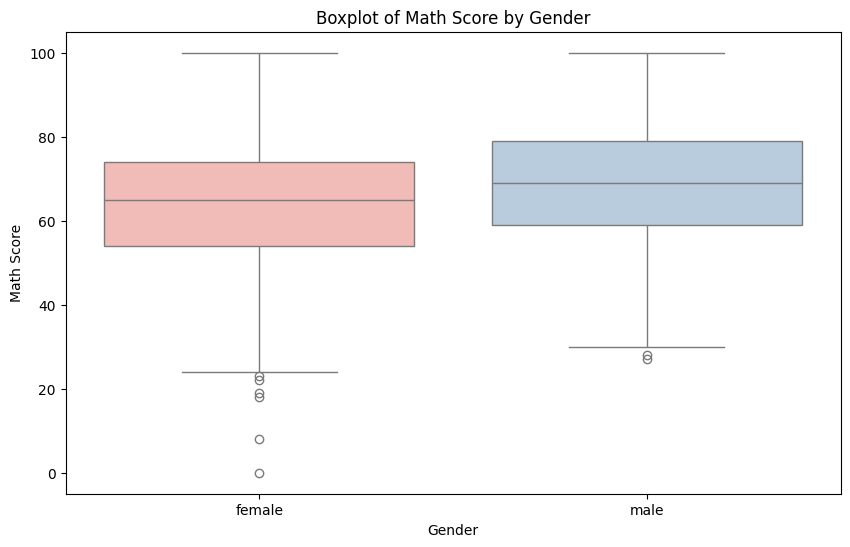

In [24]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Boxplot of Math Score by Gender')
plt.show()


C:\Users\umut\AppData\Local\Temp\ipykernel_23940\1158174140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading score', data=df, palette='Pastel1')


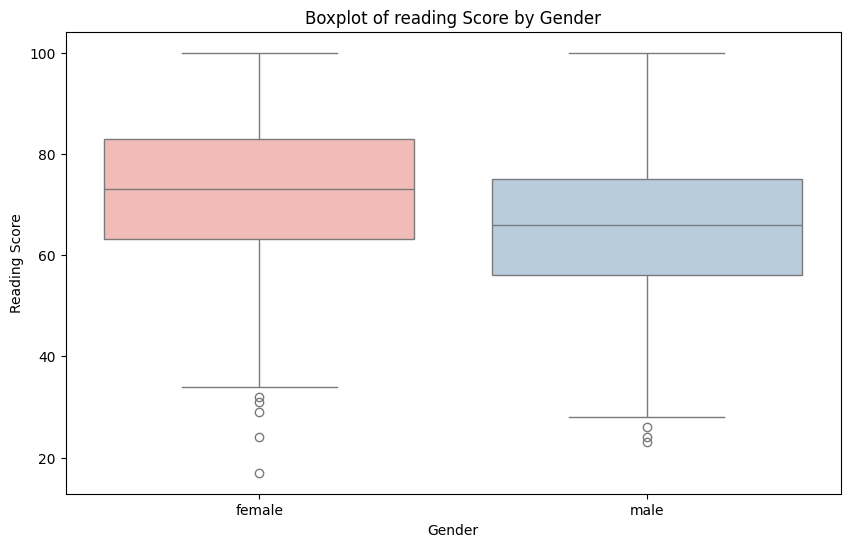

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading score', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.title('Boxplot of reading Score by Gender')
plt.show()


In [26]:
############ Histogram Graphics #################

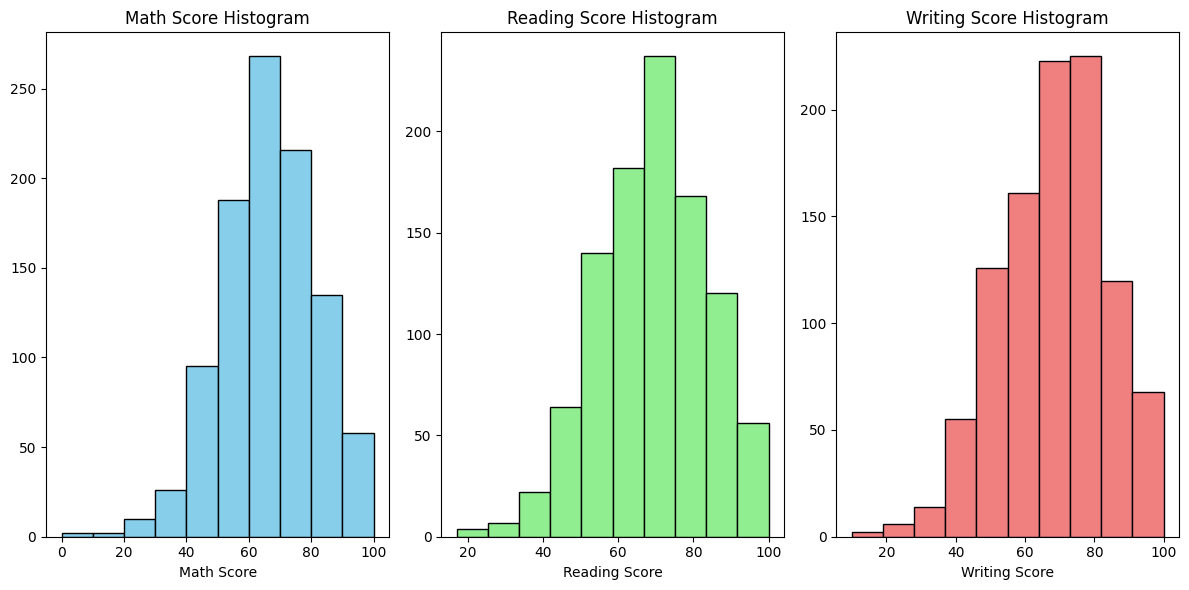

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['math score'], color='skyblue', edgecolor='black')
plt.xlabel('Math Score')
plt.title('Math Score Histogram')

plt.subplot(1, 3, 2)
plt.hist(df['reading score'], color='lightgreen', edgecolor='black')
plt.xlabel('Reading Score')
plt.title('Reading Score Histogram')

plt.subplot(1, 3, 3)
plt.hist(df['writing score'], color='lightcoral', edgecolor='black')
plt.xlabel('Writing Score')
plt.title('Writing Score Histogram')

plt.tight_layout()
plt.show()


In [28]:
########## Violinplot ###############

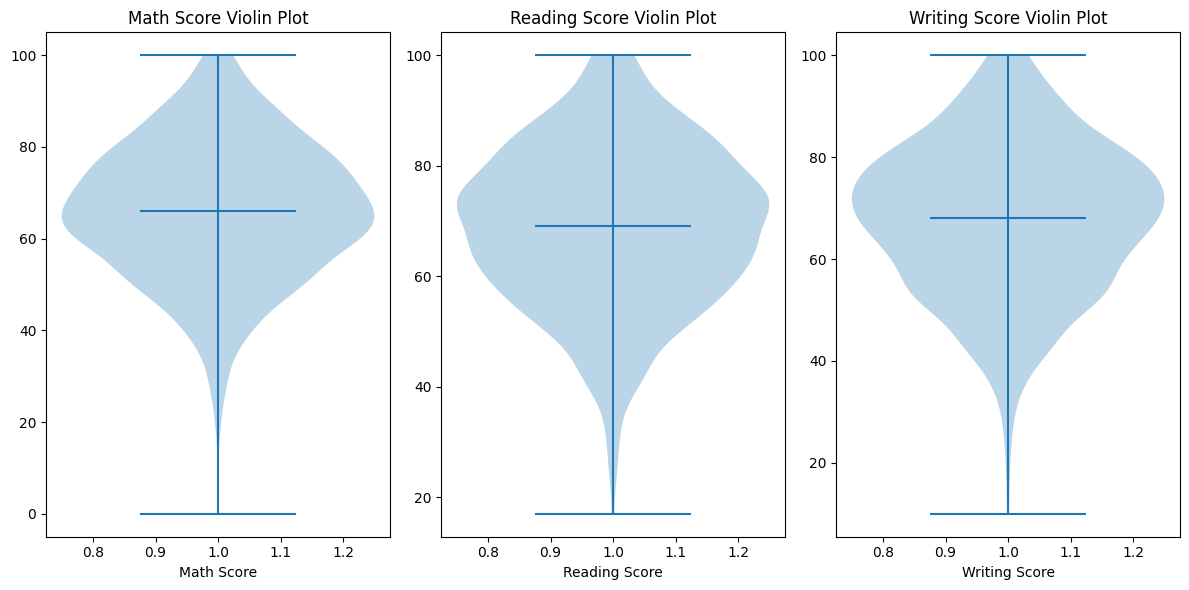

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.violinplot(df['math score'], showmeans=True, showextrema=True)
plt.xlabel('Math Score')
plt.title('Math Score Violin Plot')

plt.subplot(1, 3, 2)
plt.violinplot(df['reading score'], showmeans=True, showextrema=True)
plt.xlabel('Reading Score')
plt.title('Reading Score Violin Plot')

plt.subplot(1, 3, 3)
plt.violinplot(df['writing score'], showmeans=True, showextrema=True)
plt.xlabel('Writing Score')
plt.title('Writing Score Violin Plot')

plt.tight_layout()
plt.show()

In [30]:
def violin_plot(df, cols, nrows=3, title='No Title!'):
    n = len(cols)
    ncols = n // nrows
    if ncols * nrows < n:
        ncols += 1
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(nrows, ncols, i + 1)
        s_col = cols[i]
        sns.violinplot(x=s_col, y=df.index, data=df, palette="muted",legend=False)
        plt.xlabel(s_col)
        plt.ylabel('Frequency')
    plt.suptitle(title.upper())
    plt.tight_layout()
    plt.show()

In [31]:
columns = ["gender", "race/ethnicity", "parental level of education","lunch", "test preparation course"]

C:\Users\umut\AppData\Local\Temp\ipykernel_23940\1610854588.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=s_col, y=df.index, data=df, palette="muted",legend=False)
C:\Users\umut\AppData\Local\Temp\ipykernel_23940\1610854588.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=s_col, y=df.index, data=df, palette="muted",legend=False)
C:\Users\umut\AppData\Local\Temp\ipykernel_23940\1610854588.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=s_col, y=df.index, data=df, palette="muted",legend=False)
C:\Users\umut\AppDa

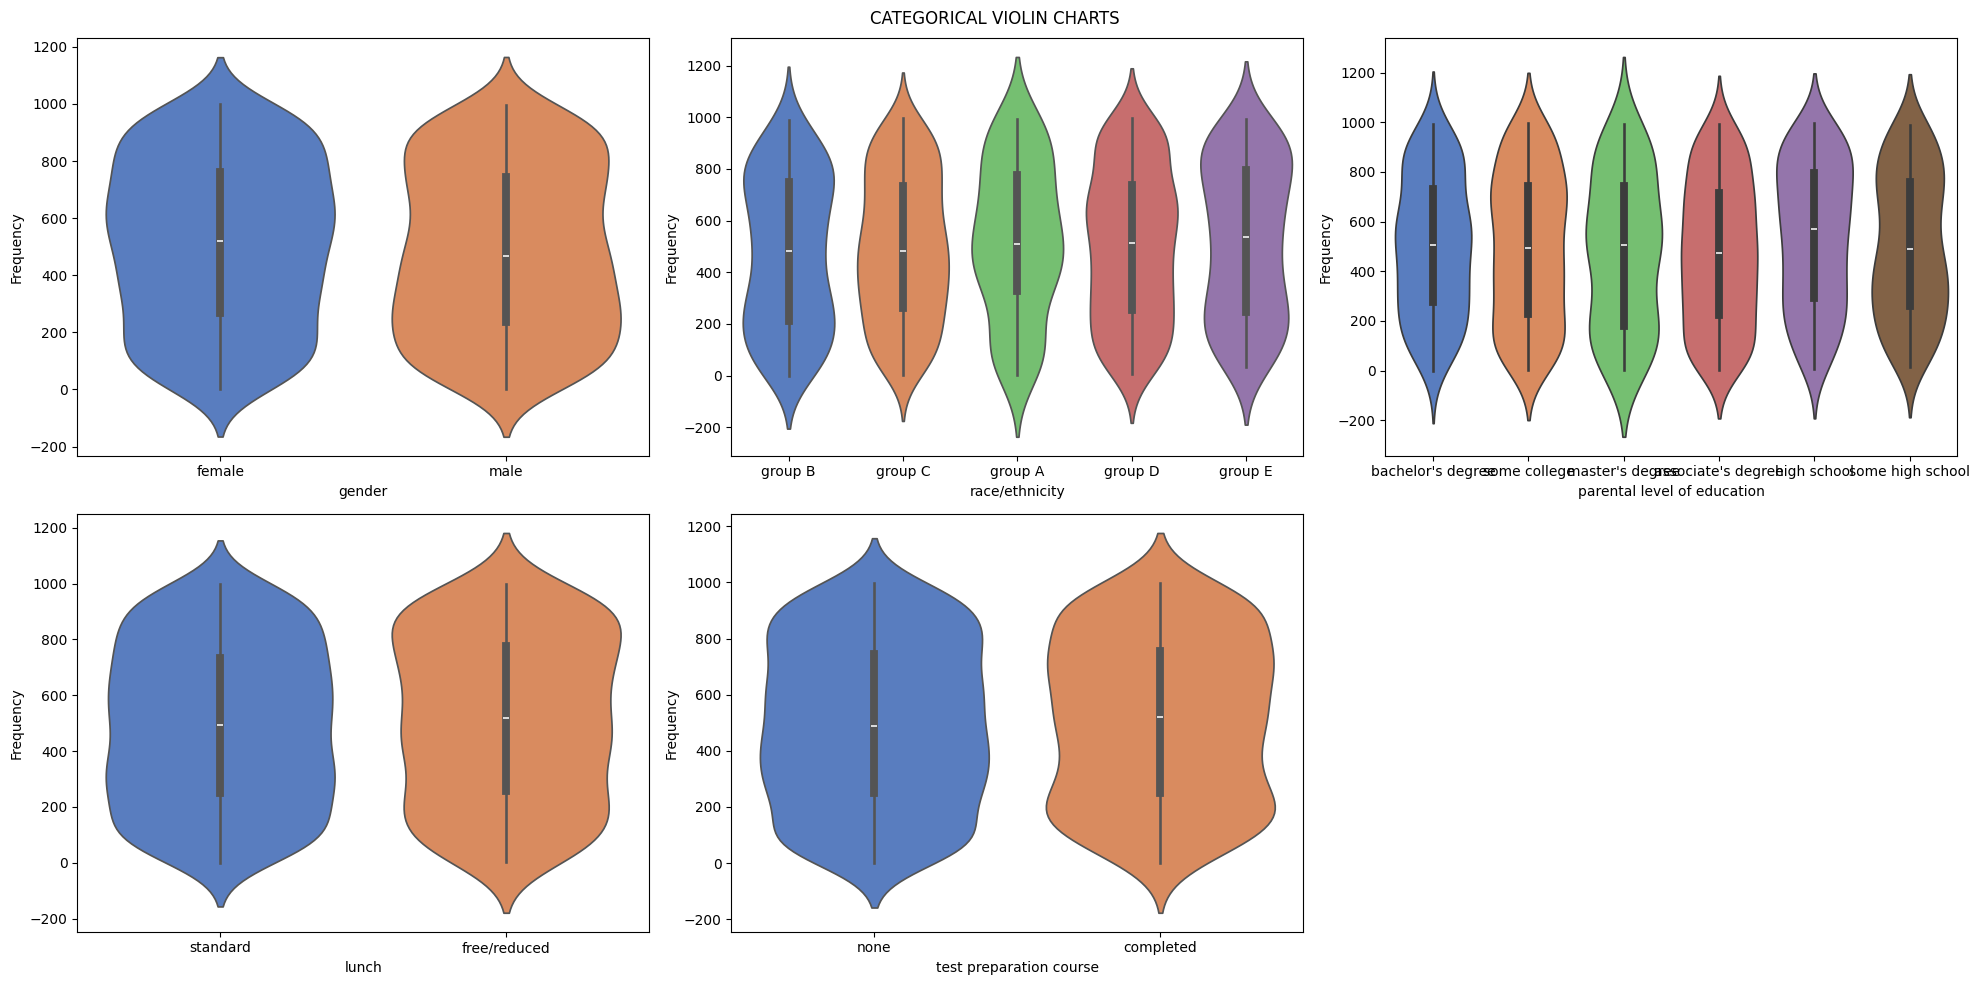

In [32]:
violin_plot(df,columns,nrows=2,title="Categorical Violin Charts")

In [ ]:
########## Scatterplot #############

<Axes: xlabel='math score', ylabel='reading score'>

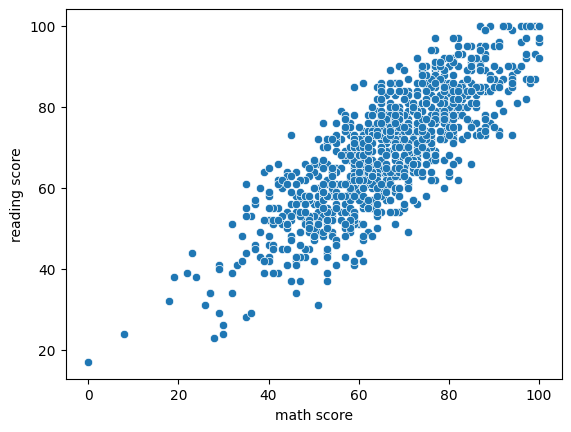

In [33]:
sns.scatterplot(x="math score", y="reading score", data=df)

<Axes: xlabel='writing score', ylabel='reading score'>

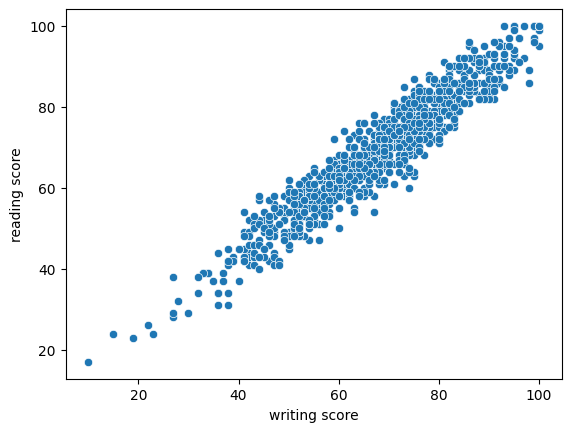

In [34]:
sns.scatterplot(x="writing score", y="reading score", data=df)

<Axes: xlabel='writing score', ylabel='math score'>

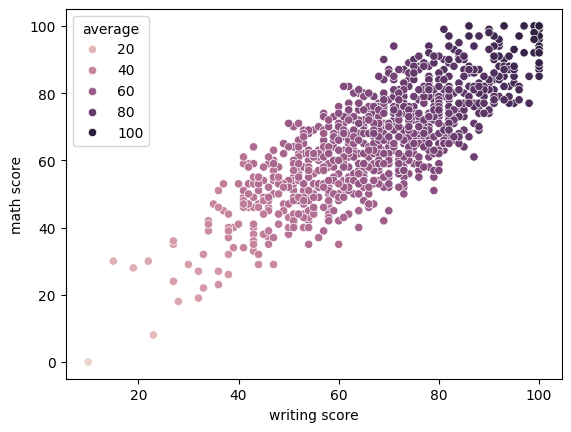

In [35]:
sns.scatterplot(x="writing score", y="math score",hue="average", data=df)

<Axes: xlabel='math score', ylabel='reading score'>

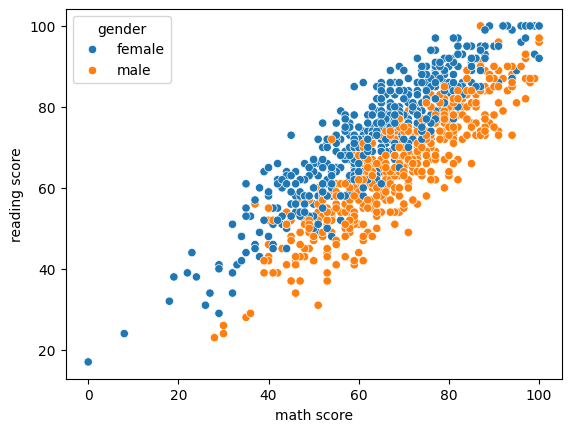

In [36]:
sns.scatterplot(x="math score", y="reading score", hue ="gender",data=df)

<Axes: xlabel='math score', ylabel='reading score'>

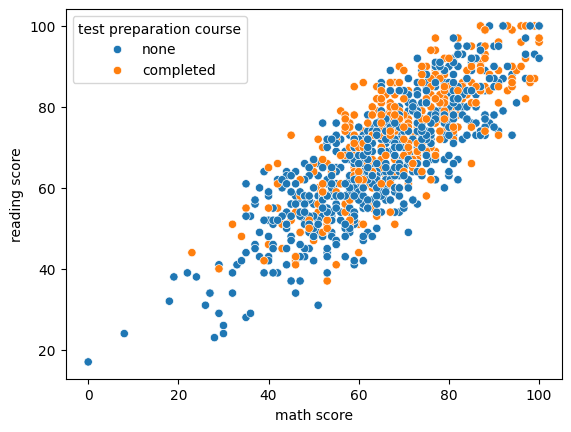

In [37]:
sns.scatterplot(x="math score", y="reading score", hue ="test preparation course",data=df)

<Axes: xlabel='math score', ylabel='reading score'>

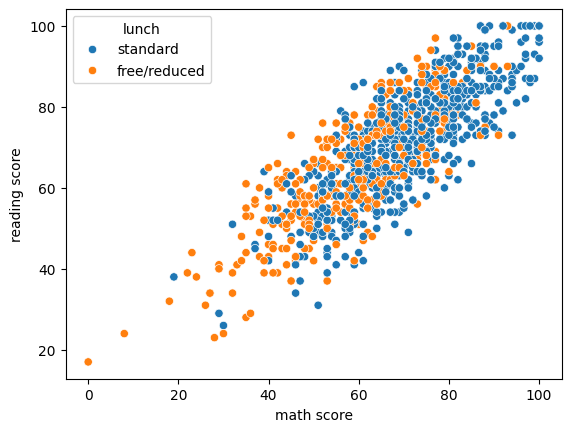

In [38]:
sns.scatterplot(x="math score", y="reading score", hue ="lunch",data=df)

<Axes: xlabel='math score', ylabel='reading score'>

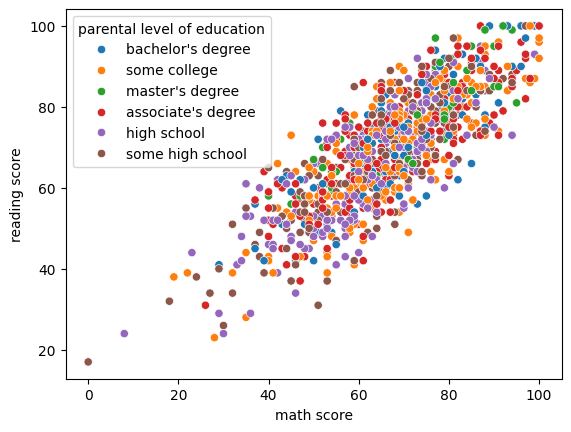

In [39]:
sns.scatterplot(x="math score", y="reading score", hue ="parental level of education",data=df)

In [40]:
############## scattermatrix ###############

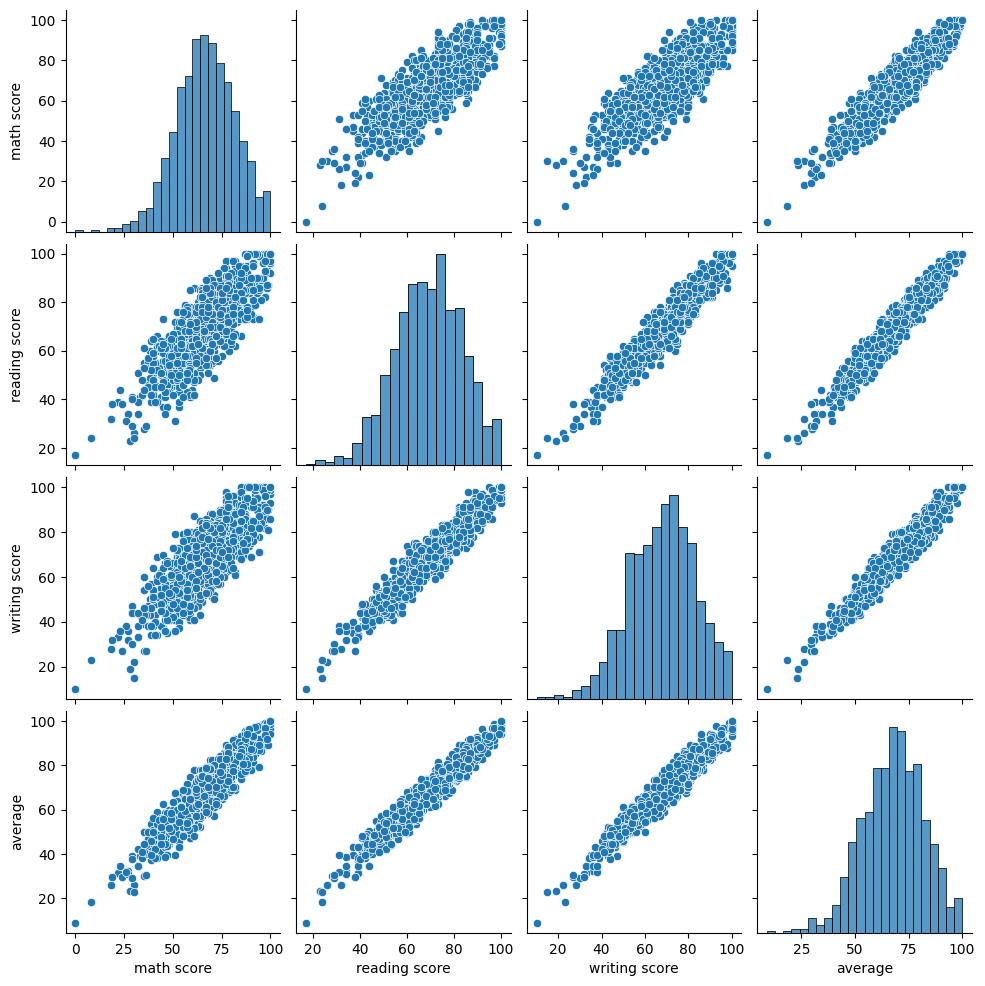

In [41]:
sns.pairplot(df)

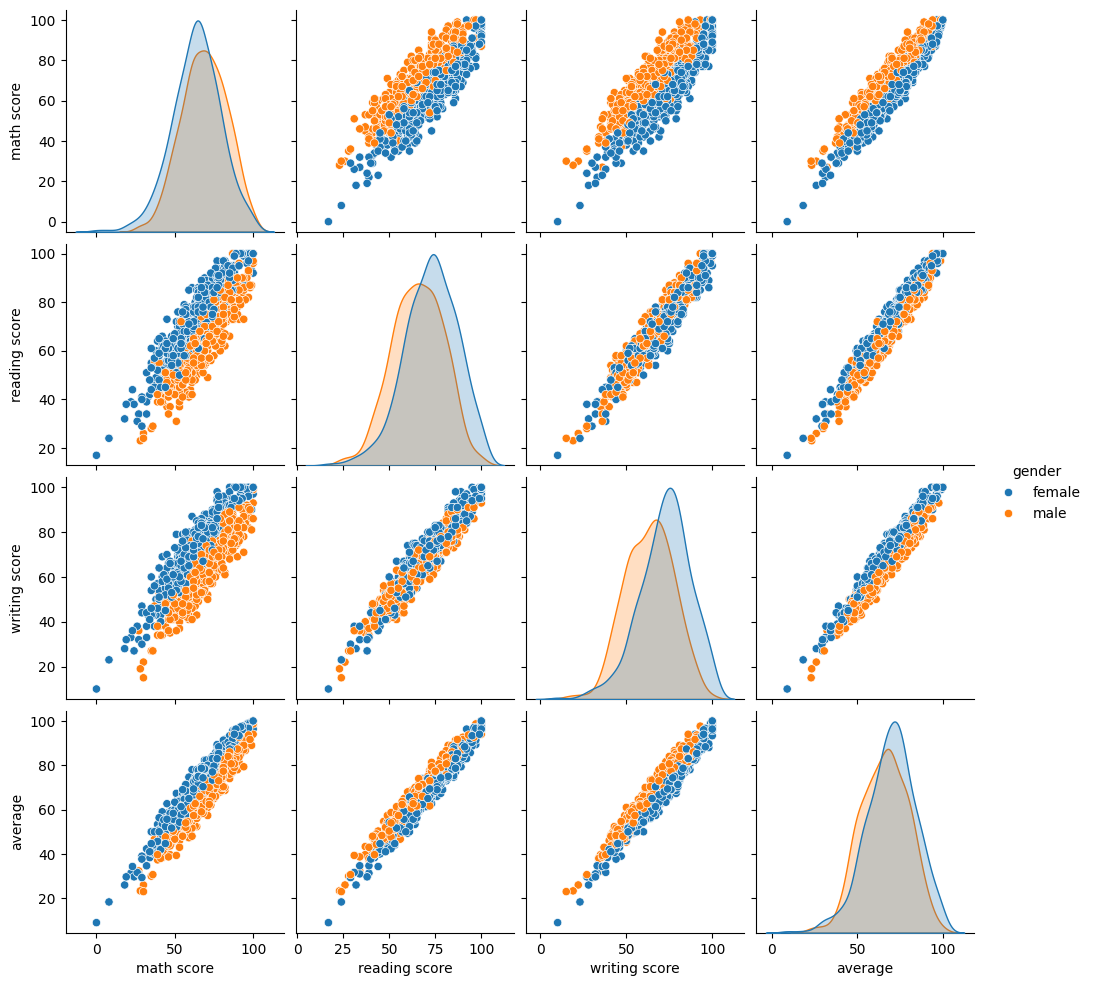

In [42]:
sns.pairplot(df,hue="gender")

In [ ]:
########### Corelation Headmap ############

Text(0.5, 1.0, 'Correlation Headmap')

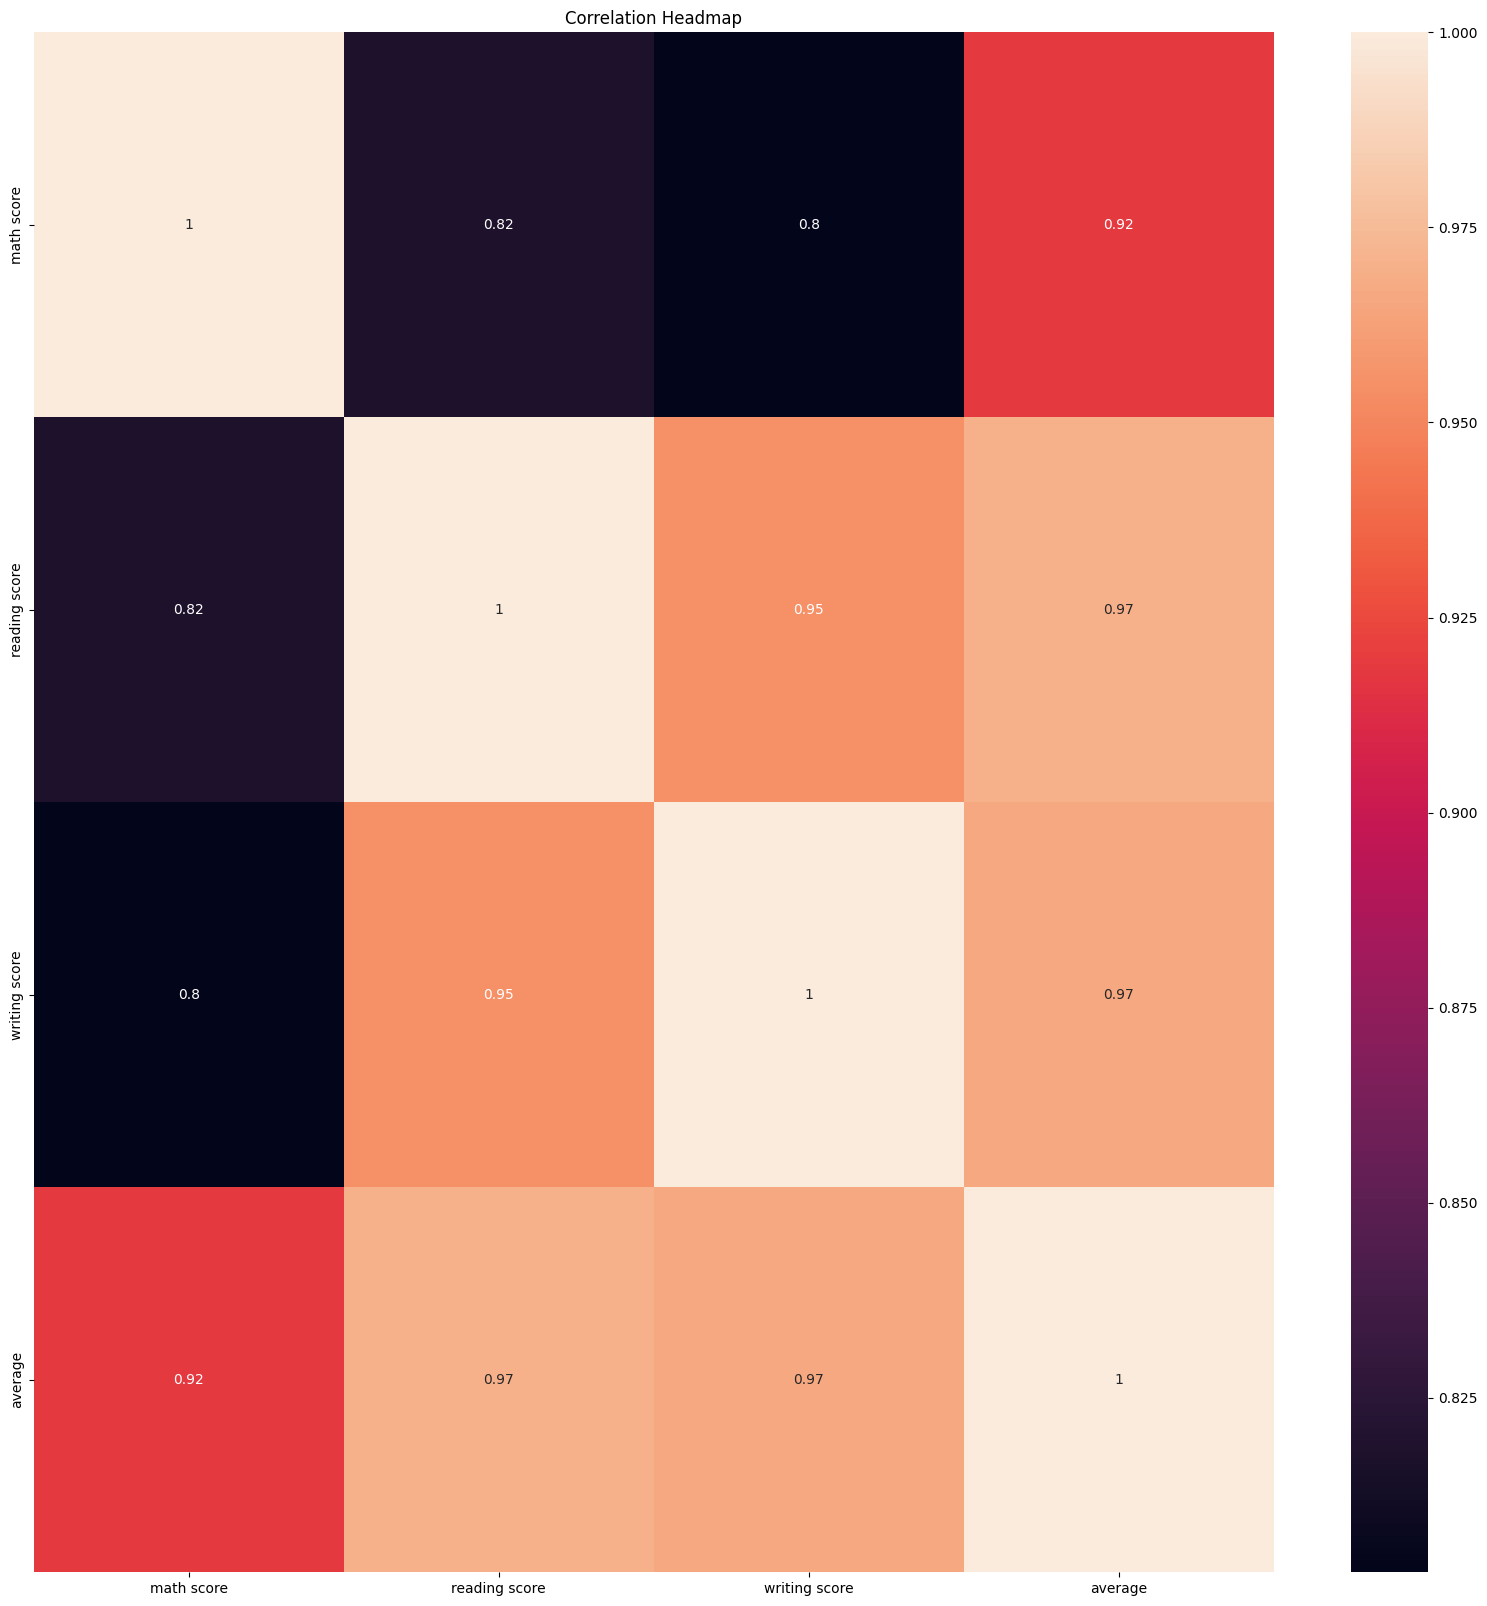

In [43]:


fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.title("Correlation Headmap")



In [ ]:
################## Line Graphic ##############

In [ ]:
sns.lineplot(x="math score", y="reading score", hue="gender",   markers=True, dashes=False,  data=df)

In [ ]:
sns.lineplot(x="math score", y="reading score", hue="test preparation course",   markers=True, dashes=False,  data=df)

In [ ]:
sns.lineplot(x="test preparation course", y="average",hue="gender", markers=True, dashes=False,  data=df)

In [ ]:
sns.lineplot(x="math score", y="reading score", hue="lunch",   markers=True, dashes=False,  data=df)

In [ ]:
sns.lineplot(x="math score", y="reading score",   markers=True, dashes=False,  data=df)

In [ ]:
sns.lineplot(x="math score", y="reading score",  hue ="race/ethnicity", markers=True, dashes=False,  data=df)

In [ ]:


#####Exam Performance Analysis: Correlations, Distributions, and Influential Factors#####



#High correlations can be observed among the exam scores, indicating that success in one exam tends to be associated with success in others. This is clearly evident in the overall average, with correlations exceeding 0.90.

#The distribution of exam scores appears to be normal, as indicated by the describe method and visualizations. Outliers are mostly detected at the lower end of the score range, particularly noticeable in math scores.

#Female students tend to have higher grades compared to their male counterparts.

#There seems to be a partial influence of parental level of education on student success.

#Ethnic group E appears to be the most successful on average.

#Completing the test preparation course is associated with higher average scores.